#**PREDICCIÓN DE CONTENIDO DE ALUMINIO Y NIVELES DE PH EN SUELO AGRÍCOLA**
Manuel Alejandro González, Santiago Alons

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from sklearn.neural_network import MLPRegressor

# Set the backend to TensorFlow
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)))


Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



###**Datos ALUMINIO**

In [ ]:
data =  pd.read_csv("/content/NIRSdata.csv", encoding = 'latin-1', low_memory = False)
listCol = [28]+ [i for i in range(51, 297)] #23 -> pH, 28 -> Al
subsetAl = data.iloc[:, listCol]
subsetAl.sample(10)

,Aluminio (Al) intercambiable,408.5,417,425.5,434,442.5,451,459.5,468,476.5,...,2414.5,2423,2431.5,2440,2448.5,2457,2465.5,2474,2482.5,2491
3357,ND,1.023203,1.033149,1.035952,1.037741,1.040631,1.047011,1.053485,1.055994,1.051175,...,0.452233,0.459727,0.469473,0.478109,0.483503,0.488431,0.494558,0.501973,0.510266,0.515220
4277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3452,0.28,1.057443,1.069787,1.076628,1.081139,1.084710,1.087161,1.088296,1.087135,1.082083,...,0.528100,0.535338,0.543255,0.551287,0.559400,0.567599,0.575875,0.583530,0.590769,0.596444
5029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,3.69,0.758171,0.758346,0.753771,0.746488,0.738168,0.730505,0.723920,0.717727,0.710529,...,0.336224,0.342957,0.351229,0.358600,0.363509,0.367755,0.372058,0.377203,0.383502,0.387389
730,NaN,1.246978,1.251745,1.253083,1.252798,1.252329,1.251785,1.250933,1.249047,1.245250,...,0.561925,0.568471,0.575743,0.583132,0.590763,0.598471,0.606042,0.613132,0.619196,0.623943
4774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1189,0.35,1.112024,1.115514,1.114036,1.109804,1.105305,1.102907,1.101895,1.100405,1.095867,...,0.617218,0.622655,0.629449,0.635971,0.641177,0.646152,0.651435,0.656837,0.662125,0.665705
1374,ND,0.993090,1.000883,1.003830,1.004923,1.005242,1.005268,1.004882,1.003494,0.999462,...,0.369686,0.374642,0.380373,0.385826,0.390412,0.394926,0.399624,0.404282,0.408837,0.411771


In [ ]:
print(subsetAl.shape)

(6178, 247)


In [ ]:
import numpy as np
na_setAl = subsetAl.copy()
na_setAl.replace('ND', np.nan, inplace = True)
na_setAl.dropna(inplace = True)
na_setAl.sample(10)

,Aluminio (Al) intercambiable,408.5,417,425.5,434,442.5,451,459.5,468,476.5,...,2414.5,2423,2431.5,2440,2448.5,2457,2465.5,2474,2482.5,2491
2862,0.23,0.816603,0.819711,0.818619,0.815947,0.813706,0.812347,0.811298,0.809556,0.805758,...,0.430010,0.434451,0.439159,0.442573,0.444612,0.446081,0.447725,0.449597,0.451942,0.453132
32,1.99,0.996732,0.997920,0.991787,0.980468,0.971155,0.967299,0.967528,0.965959,0.958798,...,0.598911,0.604856,0.612198,0.618747,0.623069,0.627013,0.631815,0.637745,0.644019,0.647534
449,1.19,1.082984,1.092550,1.097096,1.098842,1.099482,1.101031,1.102524,1.102286,1.098305,...,0.543699,0.551778,0.560388,0.567667,0.573757,0.580115,0.587644,0.595732,0.602866,0.607657
1473,1.93,1.154021,1.166212,1.173859,1.180039,1.184607,1.187684,1.189274,1.188132,1.183669,...,0.473437,0.478557,0.484306,0.490281,0.496090,0.502208,0.508162,0.513458,0.518303,0.521402
588,0.00,1.061521,1.068850,1.068822,1.064945,1.060895,1.059824,1.060425,1.059640,1.054040,...,0.485885,0.492457,0.500758,0.508948,0.515446,0.521499,0.527949,0.534795,0.541752,0.546503
1270,2.92,0.980893,0.983381,0.978338,0.970094,0.962566,0.958491,0.956957,0.953897,0.946260,...,0.593059,0.600342,0.608553,0.616414,0.622960,0.629551,0.636704,0.644176,0.651848,0.657153
3210,1.03,1.217568,1.223848,1.225376,1.225856,1.228249,1.233702,1.240305,1.244841,1.244152,...,0.760371,0.770228,0.782951,0.795449,0.804987,0.813994,0.823751,0.834337,0.846142,0.853943
3019,1.23,1.039735,1.047301,1.051119,1.053908,1.056692,1.059047,1.060518,1.060022,1.056602,...,0.453840,0.459592,0.465937,0.472388,0.478781,0.485174,0.491586,0.497342,0.502834,0.506862
3060,1.71,1.095411,1.106315,1.108383,1.106486,1.107403,1.114866,1.125617,1.132394,1.129374,...,0.715714,0.724705,0.737122,0.748488,0.755355,0.761088,0.768158,0.776919,0.787478,0.793640
3784,1.99,0.794896,0.798697,0.796729,0.791555,0.786480,0.782860,0.779441,0.775207,0.767670,...,0.367750,0.371652,0.376276,0.380366,0.383320,0.386012,0.388898,0.392082,0.395524,0.397701


In [ ]:
print(subsetAl.shape)
print(na_setAl.shape)

(6178, 247)
(1599, 247)


In [ ]:
from sklearn.impute import SimpleImputer
si_Al = subsetAl.copy()
imputer= SimpleImputer(strategy='mean')
si_Al.iloc[:, 1:] = imputer.fit_transform(si_Al.iloc[:, 1:])
si_Al.sample(10)

,Aluminio (Al) intercambiable,408.5,417,425.5,434,442.5,451,459.5,468,476.5,...,2414.5,2423,2431.5,2440,2448.5,2457,2465.5,2474,2482.5,2491
6061,NaN,1.017225,1.023955,1.025025,1.023356,1.021516,1.020933,1.021048,1.019757,1.014838,...,0.489475,0.495494,0.502497,0.509004,0.514315,0.519431,0.524900,0.530589,0.536402,0.540383
1091,ND,0.998975,1.005394,1.006702,1.004845,1.002313,1.000365,0.999091,0.996778,0.991951,...,0.373169,0.377887,0.383030,0.387277,0.390405,0.392926,0.395283,0.397516,0.399784,0.400863
467,1.19,1.194405,1.203759,1.208471,1.211524,1.213960,1.216072,1.216941,1.215481,1.210875,...,0.493412,0.499736,0.506917,0.514137,0.521310,0.528431,0.535412,0.541547,0.547150,0.551106
3162,ND,1.046064,1.056590,1.062941,1.067974,1.072322,1.075463,1.077132,1.077065,1.074346,...,0.533646,0.541253,0.549346,0.557042,0.564377,0.571849,0.579597,0.586940,0.593697,0.598596
3555,ND,1.078968,1.089159,1.093170,1.094369,1.095488,1.097780,1.100583,1.101404,1.097606,...,0.561879,0.568623,0.576052,0.583287,0.589781,0.596431,0.603503,0.610664,0.617593,0.622803
4304,NaN,1.017225,1.023955,1.025025,1.023356,1.021516,1.020933,1.021048,1.019757,1.014838,...,0.489475,0.495494,0.502497,0.509004,0.514315,0.519431,0.524900,0.530589,0.536402,0.540383
4745,NaN,1.017225,1.023955,1.025025,1.023356,1.021516,1.020933,1.021048,1.019757,1.014838,...,0.489475,0.495494,0.502497,0.509004,0.514315,0.519431,0.524900,0.530589,0.536402,0.540383
4805,NaN,1.017225,1.023955,1.025025,1.023356,1.021516,1.020933,1.021048,1.019757,1.014838,...,0.489475,0.495494,0.502497,0.509004,0.514315,0.519431,0.524900,0.530589,0.536402,0.540383
4791,NaN,1.017225,1.023955,1.025025,1.023356,1.021516,1.020933,1.021048,1.019757,1.014838,...,0.489475,0.495494,0.502497,0.509004,0.514315,0.519431,0.524900,0.530589,0.536402,0.540383
6016,NaN,1.017225,1.023955,1.025025,1.023356,1.021516,1.020933,1.021048,1.019757,1.014838,...,0.489475,0.495494,0.502497,0.509004,0.514315,0.519431,0.524900,0.530589,0.536402,0.540383


In [ ]:
si_Al.replace('ND', np.nan, inplace = True)
si_Al.dropna(inplace = True)
si_Al.sample(10)

,Aluminio (Al) intercambiable,408.5,417,425.5,434,442.5,451,459.5,468,476.5,...,2414.5,2423,2431.5,2440,2448.5,2457,2465.5,2474,2482.5,2491
802,2.40,0.915876,0.917234,0.910571,0.899823,0.890762,0.887702,0.888299,0.887358,0.880531,...,0.511972,0.518849,0.527178,0.534674,0.540064,0.545433,0.551581,0.558413,0.565740,0.570542
3225,2.59,1.051130,1.065698,1.072866,1.078126,1.084351,1.091910,1.099592,1.103472,1.100964,...,0.537185,0.546062,0.558211,0.568978,0.575104,0.580523,0.587508,0.596509,0.606892,0.612892
42,0.52,0.945423,0.946244,0.940410,0.931802,0.922294,0.915084,0.909237,0.903092,0.894396,...,0.426930,0.429641,0.433063,0.436258,0.439131,0.441861,0.444750,0.447564,0.450326,0.452065
3764,1.99,1.246385,1.258180,1.267117,1.275326,1.283697,1.290373,1.295443,1.298287,1.298507,...,0.547615,0.556111,0.565249,0.574711,0.584057,0.593396,0.602800,0.611471,0.619641,0.626198
2863,2.57,0.799519,0.801970,0.800990,0.798497,0.796605,0.795230,0.794511,0.793081,0.789411,...,0.396353,0.400552,0.404998,0.408338,0.410131,0.411422,0.412902,0.414590,0.416751,0.417856
1239,3.03,0.994620,0.998023,0.990829,0.978967,0.969957,0.969292,0.973835,0.975281,0.967881,...,0.613415,0.621205,0.630839,0.638884,0.644123,0.649300,0.656106,0.664202,0.672487,0.677347
302,3.20,0.893884,0.899549,0.897733,0.890815,0.883232,0.878832,0.877233,0.874975,0.868803,...,0.358768,0.366009,0.374966,0.382925,0.388177,0.392587,0.396878,0.401996,0.408546,0.412589
3780,1.25,0.849473,0.852893,0.850221,0.844731,0.839367,0.834943,0.831015,0.826235,0.818541,...,0.378281,0.381873,0.386071,0.390092,0.393269,0.396280,0.399436,0.402720,0.406217,0.408399
3393,2.77,1.057290,1.064915,1.070285,1.075509,1.080031,1.083364,1.085433,1.086100,1.085049,...,0.560798,0.570716,0.581594,0.590637,0.597540,0.604473,0.612380,0.620795,0.629283,0.635144
2572,1.26,1.017225,1.023955,1.025025,1.023356,1.021516,1.020933,1.021048,1.019757,1.014838,...,0.489475,0.495494,0.502497,0.509004,0.514315,0.519431,0.524900,0.530589,0.536402,0.540383


In [ ]:
print(si_Al.shape)

(1661, 247)


##**Datos PH**

####**Cargar datos de pH**

In [ ]:
listCol = [23]+ [i for i in range(51, 297)]
subsetpH = data.iloc[:, listCol]
subsetpH.sample(10)

,pH,408.5,417,425.5,434,442.5,451,459.5,468,476.5,...,2414.5,2423,2431.5,2440,2448.5,2457,2465.5,2474,2482.5,2491
2796,5.05,0.890888,0.895558,0.894596,0.890840,0.886957,0.885103,0.885005,0.883808,0.879361,...,0.491757,0.498773,0.507001,0.514061,0.519040,0.523652,0.529017,0.535005,0.541240,0.545135
2444,5.68,0.835814,0.842518,0.846101,0.848920,0.850342,0.850360,0.849135,0.846178,0.840761,...,0.398735,0.404422,0.411318,0.417894,0.423202,0.428185,0.433432,0.438962,0.444594,0.448364
2056,5.60,1.054804,1.066142,1.074175,1.081114,1.087325,1.091889,1.094552,1.095074,1.092711,...,0.533632,0.541836,0.550531,0.558870,0.567077,0.575570,0.584188,0.592394,0.599861,0.605619
2013,5.68,1.034415,1.045183,1.051281,1.055029,1.058238,1.060497,1.061606,1.060606,1.056807,...,0.374773,0.377928,0.381523,0.384904,0.387608,0.390028,0.392548,0.394887,0.397092,0.398380
5887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,4.79,1.085474,1.093997,1.096499,1.096781,1.097612,1.100175,1.102546,1.102758,1.099076,...,0.424603,0.430764,0.438391,0.445370,0.450335,0.454746,0.459566,0.465041,0.471121,0.474593
5628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3803,4.37,0.792907,0.795852,0.789580,0.779592,0.772421,0.771815,0.774680,0.774671,0.766992,...,0.455684,0.463279,0.473353,0.482681,0.488367,0.493123,0.498774,0.505683,0.513722,0.518528
4148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,NaN,0.751645,0.754601,0.749413,0.739940,0.730122,0.724570,0.722763,0.720786,0.714982,...,0.360158,0.369185,0.380887,0.391096,0.396158,0.399014,0.402181,0.407176,0.414747,0.418989


###**Probar eliminar ND**

In [ ]:
import numpy as np
na_ph = subsetpH.copy()
na_ph.replace('ND', np.nan, inplace = True)
na_ph.dropna(inplace = True)
na_ph.sample(10)

,pH,408.5,417,425.5,434,442.5,451,459.5,468,476.5,...,2414.5,2423,2431.5,2440,2448.5,2457,2465.5,2474,2482.5,2491
3811,5.18,0.964643,0.968492,0.964859,0.957916,0.952488,0.950012,0.949392,0.947318,0.940101,...,0.506582,0.511332,0.516590,0.521745,0.526825,0.532022,0.537610,0.542813,0.547844,0.551873
3394,6.47,0.885423,0.892775,0.894412,0.893240,0.891186,0.888926,0.887430,0.885407,0.879071,...,0.476361,0.484583,0.494258,0.503727,0.511446,0.518731,0.526382,0.534726,0.543360,0.550159
1764,6.15,1.100961,1.106118,1.106909,1.105647,1.103507,1.101445,1.099558,1.096862,1.091991,...,0.471443,0.474720,0.478517,0.482341,0.485875,0.489697,0.493483,0.496879,0.500014,0.502029
1372,6.00,1.001370,1.009983,1.013401,1.015659,1.016847,1.017123,1.016691,1.014764,1.010592,...,0.370983,0.376213,0.382336,0.388236,0.393264,0.398109,0.403001,0.407866,0.412726,0.415957
2272,5.86,0.933291,0.940650,0.942431,0.940419,0.937900,0.936660,0.936488,0.935249,0.930351,...,0.452445,0.458956,0.466375,0.473176,0.478502,0.483239,0.488051,0.493234,0.498937,0.502857
1198,7.10,1.090924,1.096547,1.096418,1.093291,1.090093,1.088753,1.088737,1.088226,1.084890,...,0.493421,0.501854,0.511746,0.520369,0.525979,0.530415,0.534740,0.540036,0.546582,0.550814
994,5.24,1.058144,1.069584,1.072955,1.070163,1.067064,1.067537,1.070550,1.071842,1.067151,...,0.497965,0.505252,0.514898,0.524387,0.531374,0.537698,0.544952,0.552965,0.561606,0.567500
1896,5.83,1.040001,1.048602,1.051652,1.052922,1.054083,1.055772,1.056945,1.056015,1.051467,...,0.487876,0.494297,0.501487,0.508621,0.515196,0.521798,0.528791,0.535386,0.541485,0.545837
1254,4.44,1.084324,1.088164,1.084242,1.076089,1.068828,1.066806,1.067837,1.066514,1.058260,...,0.643850,0.649031,0.654954,0.659916,0.663829,0.668346,0.673791,0.680064,0.686067,0.689909
2274,4.22,0.961612,0.970951,0.973913,0.975362,0.977998,0.981731,0.985169,0.985111,0.978897,...,0.452904,0.459434,0.466401,0.472370,0.476867,0.481186,0.485896,0.490864,0.495792,0.499231


In [ ]:
print(subsetpH.shape)
print(na_ph.shape)

(6178, 247)
(3178, 247)


###**Probar remplazar reflectancia con mean y pH con moda**

In [ ]:
si_ph = subsetpH.copy()
imputer= SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='most_frequent')
si_ph.iloc[:, 1:] = imputer.fit_transform(si_ph.iloc[:, 1:])
si_ph.iloc[:,0] = imputer2.fit_transform(si_ph.iloc[:,0].values.reshape(-1,1))
si_ph.sample(10)

,pH,408.5,417,425.5,434,442.5,451,459.5,468,476.5,...,2414.5,2423,2431.5,2440,2448.5,2457,2465.5,2474,2482.5,2491
2344,5.86,1.002584,1.012858,1.016734,1.015359,1.013822,1.012584,1.012513,1.011280,1.006085,...,0.505986,0.512929,0.521155,0.529486,0.536740,0.543848,0.551645,0.559637,0.567672,0.573957
2049,6.68,1.025156,1.031554,1.033691,1.034416,1.035523,1.037086,1.038495,1.038408,1.035184,...,0.439266,0.445285,0.451820,0.457809,0.462908,0.467942,0.472985,0.478014,0.482926,0.486248
1657,6.23,1.006520,1.009234,1.003053,0.991986,0.980464,0.972842,0.969364,0.965971,0.959078,...,0.531420,0.539125,0.547548,0.555116,0.561244,0.567062,0.573137,0.579240,0.585544,0.590551
2949,5.92,0.998392,1.004379,1.005078,1.003015,1.000163,0.998043,0.996755,0.995087,0.990624,...,0.520307,0.526907,0.534269,0.541067,0.546824,0.552379,0.558413,0.564361,0.570288,0.575134
2832,5.10,1.017225,1.023955,1.025025,1.023356,1.021516,1.020933,1.021048,1.019757,1.014838,...,0.489475,0.495494,0.502497,0.509004,0.514315,0.519431,0.524900,0.530589,0.536402,0.540383
2657,5.10,1.017225,1.023955,1.025025,1.023356,1.021516,1.020933,1.021048,1.019757,1.014838,...,0.489475,0.495494,0.502497,0.509004,0.514315,0.519431,0.524900,0.530589,0.536402,0.540383
6074,5.10,1.017225,1.023955,1.025025,1.023356,1.021516,1.020933,1.021048,1.019757,1.014838,...,0.489475,0.495494,0.502497,0.509004,0.514315,0.519431,0.524900,0.530589,0.536402,0.540383
2866,6.47,0.854969,0.857798,0.855824,0.851796,0.848245,0.846773,0.846468,0.845294,0.841347,...,0.469865,0.474824,0.480263,0.484463,0.486855,0.488647,0.490829,0.493268,0.496381,0.498196
2218,5.14,0.903243,0.906630,0.903303,0.896082,0.888785,0.884232,0.882331,0.879850,0.873491,...,0.447194,0.452886,0.459539,0.465074,0.468335,0.470857,0.473668,0.477584,0.482437,0.485300
3357,5.50,1.023203,1.033149,1.035952,1.037741,1.040631,1.047011,1.053485,1.055994,1.051175,...,0.452233,0.459727,0.469473,0.478109,0.483503,0.488431,0.494558,0.501973,0.510266,0.515220


In [ ]:
print(si_ph.shape)

(6178, 247)


##**pH SVM -> SVR**

####Normalización

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

In [ ]:
X= na_ph.iloc[:, 1:]
Y= na_ph.iloc[:, 0]
X, X_test, Y, Y_test= train_test_split(X, Y,test_size=0.1, random_state=1)
scaler = StandardScaler()
scaler.fit(X)
Xn = scaler.transform(X)
scaler = StandardScaler()
scaler.fit(X_test)
Xn_test = scaler.transform(X_test)

In [ ]:
Y = np.array([float(element[1:]) if isinstance(element, str) and element.startswith('<') else float(element) for element in Y.astype(str)])

In [ ]:
#CrossVal para datos sin normalizar
SVM = SVR()
scores= cross_val_score(SVM, X, Y, cv=5)
print(np.mean(scores))

0.532954737111417


In [ ]:
#CrossVal Normalizar
SVM = SVR()
scores= cross_val_score(SVM, Xn, Y, cv=5)
print(np.mean(scores))

0.5768677676962317


###CrossVal para PCA

In [ ]:
from sklearn.decomposition import PCA

componentes=[0.99, 0.999, 0.9999, 0.99999, 0.999999]
scor=[]

for i in range (0, 5):
  pca=PCA(n_components=componentes[i], svd_solver='full')
  Xn_PCA=pca.fit_transform(Xn)
  SVM=SVR()
  scor.append(cross_val_score(SVM, Xn_PCA, Y, cv=5))

#Se prueba PCA con el total de componentes (246)
pca=PCA(n_components=246)
Xn_pca=pca.fit_transform(Xn)
SVM=SVR()
scor.append(cross_val_score(SVM, Xn_PCA, Y, cv=5))

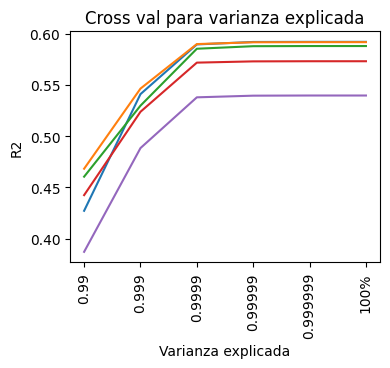

In [ ]:
import matplotlib.pyplot as plt
list_var=[0.99, 0.999, 0.9999, 0.99999, 0.999999, '100%']
plt.figure(figsize=(4, 3))
plt.plot(list_var, scor)
plt.title("Cross val para varianza explicada")
plt.xlabel("Varianza explicada")
plt.xticks(rotation=90)
plt.ylabel("R2")
plt.show()

In [ ]:
#Me quedo con esta pca
pca = PCA(n_components=246)
Xn_pca= pca.fit_transform(Xn)
SVM = SVR().fit(Xn_pca,Y)
print(np.mean(cross_val_score(SVM, Xn_pca, Y, cv=5)))

0.5768640848204306


###Comprobar Hiperparamteros

###Kernel

In [ ]:
import matplotlib.pyplot as plt
Lista_kernel= ['linear', 'poly', 'sigmoid', 'rbf']
score_list_fun=[]
lista_intentos=[]
for i in range(0,4):

    SVM = SVR(kernel = Lista_kernel[i])
    scores = cross_val_score(SVM, Xn_pca, Y, cv=5)
    score_list_fun.append(np.mean(np.array(scores)))
    lista_intentos.append(str(Lista_kernel[i]))

linear : 0.6377461121756394


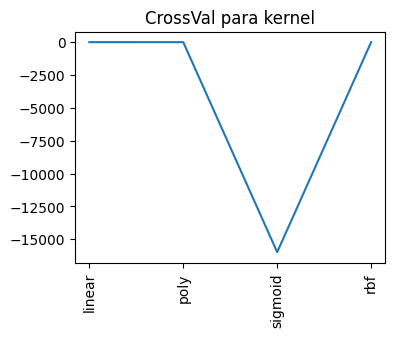

In [ ]:
print(lista_intentos[np.argmax(score_list_fun)], ":", score_list_fun[np.argmax(score_list_fun)])
plt.figure(figsize=(4,3))
plt.plot(lista_intentos, score_list_fun)
plt.xticks(rotation='vertical')
plt.title("CrossVal para kernel")
plt.show() 

###Gamma

In [ ]:
Lista_gamma=[0.1, 1, 100, 'auto']
score_list_gamma = []
lista_intentos_gamma=[]

for i in range(0, 4):
  SVM = SVR(kernel = 'linear', gamma=Lista_gamma[i])
  scores = cross_val_score(SVM, Xn_PCA, Y, cv=5)
  score_list_gamma.append(np.mean(np.array(scores)))
  lista_intentos_gamma.append(str(Lista_gamma[i]))

0.1 : 0.6341431413324564


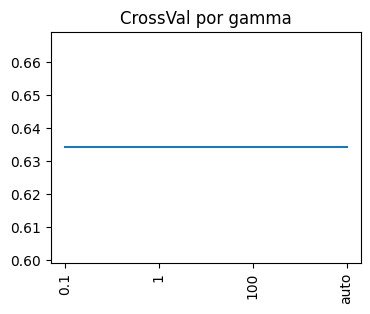

In [ ]:
print(lista_intentos_gamma[np.argmax(score_list_gamma)], ":", score_list_gamma[np.argmax(score_list_gamma)])
plt.figure(figsize=(4,3))
plt.plot(lista_intentos_gamma, score_list_gamma)
plt.xticks(rotation='vertical')
plt.title("CrossVal por gamma")
plt.show() 

In [ ]:
SVM=SVR(kernel="linear", gamma=0.1).fit(Xn_pca, Y)

###Guardar

In [ ]:
import pickle 
with open('modelo_SVM_ph.pk1', 'wb') as file:
  pickle.dump(SVM, file)
with open('scaler_SVM_ph.pk1', 'wb') as file:
  pickle.dump(scaler, file)
with open('pca_SVM_ph.pk1', 'wb') as file:
  pickle.dump(pca, file)

###Cargar

In [ ]:
with open('modelo_SVM_ph.pk1', 'rb') as file:
    SVM = pickle.load(file)
with open('scaler_SVM_ph.pk1', 'rb') as file:
    scaler = pickle.load(file)
with open('pca_SVM_ph.pk1', 'rb') as file:
    pca = pickle.load(file)

###Evaluar

In [ ]:
X_hold_ev=scaler.transform(X_test)
X_hold_ev=pca.transform(X_hold_ev)
print(SVM.score(X_hold_ev, Y_test))

0.5722062709951737


##**pH ANN**

####**Probar Normalización**
R2:
>sin normalizar: 0.457

>normalizado: 0.561

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
y = na_ph.iloc[:, 0]
X = na_ph.iloc[:, 1:]
X, X_hold, y, y_hold = train_test_split(X, y,test_size=0.1, random_state=1)
scaler = StandardScaler()
scaler.fit(X)
Xn = scaler.transform(X)
scaler = StandardScaler()
scaler.fit(X_hold)
Xn_hold = scaler.transform(X_hold)

In [ ]:
#Hay DOS pH que dicen <3.8, eliminar el <
y = np.array([float(element[1:]) if isinstance(element, str) and element.startswith('<') else float(element) for element in y.astype(str)])

In [ ]:
#CrossVal para datos sin normalizar
regAnn = MLPRegressor(random_state=0, max_iter=500)
scores = cross_val_score(regAnn, X, y, cv=5)
print(np.mean(scores))

0.45716162001539973


In [ ]:
#CrossVal para datos normalizados
regAnn = MLPRegressor(random_state=0, max_iter=500)
scores = cross_val_score(regAnn, Xn, y, cv=5)
print(np.mean(scores))

0.5607078889764905


###**CrossVal para PCA**
R2=0.787

Mejor usar Normalizados con PCA con los 246 componentes (por alguna razón es mejor la PCA conservando todos los componentes que no hacer la PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Estamos manejando inicialmente casi 240 caracteristicas, así que podemos tener igual un porcentaje alto en la pca
var = [0.99, 0.999, 0.9999, 0.99999, 0.999999]
scor = []
for i in range(0,5):
  pca = PCA(n_components=var[i], svd_solver='full')
  Xn_pca= pca.fit_transform(Xn)
  regAnn = MLPRegressor(random_state=1, max_iter=500)
  scor.append(np.mean(cross_val_score(regAnn, Xn_pca, y, cv=5)))

#PCA con todos los componentes
pca = PCA(n_components=246)
Xn_pca= pca.fit_transform(Xn)
regAnn = MLPRegressor(random_state=1, max_iter=500)
scor.append(np.mean(cross_val_score(regAnn, Xn_pca, y, cv=5)))

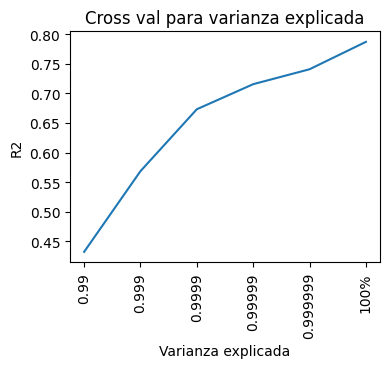

In [ ]:
import matplotlib.pyplot as plt
list_var = [0.99, 0.999, 0.9999, 0.99999, 0.999999, '100%']
plt.figure(figsize=(4,3))
plt.plot(list_var, scor)
plt.title("Cross val para varianza explicada")
plt.xlabel("Varianza explicada")
plt.xticks(rotation=90)
plt.ylabel("R2")
plt.show()

In [ ]:
#ME QUEDO CON ESTA PCA:
pca = PCA(n_components=246)
Xn_pca= pca.fit_transform(Xn)
regAnn = MLPRegressor(random_state=1, max_iter=500).fit(Xn_pca,y)
print(np.mean(cross_val_score(regAnn, Xn_pca, y, cv=5)))

0.7872646870518345


###**Iteracion de hiperparametros**
Mejor resultado: Normalizado + PCA + ReLU + Adam + Alpha = 0.0001 (default)

In [ ]:
w#PROBAR COMBINACIONES SOLVER Y FUNCION DE ACTIVACIÓN
f_act = ['identity', 'logistic', 'tanh', 'relu']
solv= ['lbfgs', 'sgd', 'adam']
lista_intentos =[]
lista_scores_total = []
for i in range(0,4):#i: activacion
  for j in range(0,3):#j: solver
    regAnn = MLPRegressor(activation= f_act[i], solver=solv[j], random_state=1, max_iter=2000)
    scores = cross_val_score(regAnn, Xn_pca, y, cv=5)
    lista_scores_total.append(np.mean(np.array(scores)))
    lista_intentos.append(str(f_act[i])+ " "+str(solv[j]))

print(lista_intentos[np.argmax(lista_scores_total)], ":", lista_scores_total[np.argmax(lista_scores_total)])

plt.figure(figsize=(4,3))
plt.plot(lista_intentos, lista_scores_total)
plt.xticks(rotation='vertical')
plt.title("CrossVal por combinaciones solver y funcion de activacion")
plt.show() #Mejor es relu+lbfgs

relu adam : 0.7872646870518336


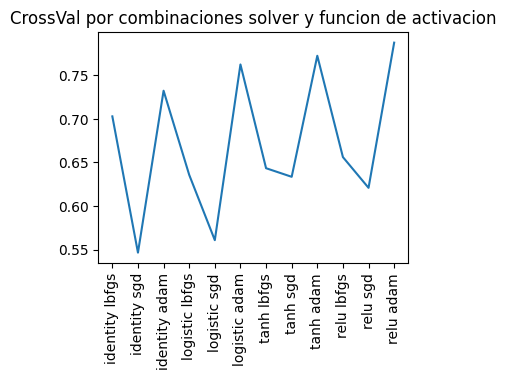

In [ ]:
print(lista_intentos[np.argmax(lista_scores_total)], ":", lista_scores_total[np.argmax(lista_scores_total)])

plt.figure(figsize=(4,3))
plt.plot(lista_intentos, lista_scores_total)
plt.xticks(rotation='vertical')
plt.title("CrossVal por combinaciones solver y funcion de activacion")
plt.show() #Mejor es relu+lbfgs

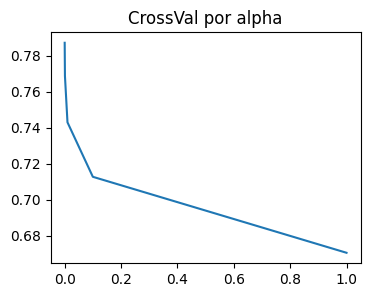

In [ ]:
import matplotlib.pyplot as plt
regul= [0.0001, 0.001, 0.01, 0.1, 1]
score_list_reg = []
for i in range(0,5):
  regAnn = MLPRegressor(activation= 'relu',solver='adam', alpha=regul[i],random_state=1, max_iter=500)
  scores = cross_val_score(regAnn, Xn_pca, y, cv=5)
  score_list_reg.append(np.mean(scores))

plt.figure(figsize=(4,3))
plt.plot(regul, score_list_reg)
plt.title("CrossVal por alpha")
plt.show() #Mejor es 0.0001

In [ ]:
#Me quedo con:
regAnn = MLPRegressor(activation= 'relu',solver='adam',random_state=1, max_iter=2000).fit(Xn_pca,y)

###**Guardar**

In [ ]:
import pickle
with open('modelo_ANN_pH.pkl', 'wb') as file:
    pickle.dump(regAnn, file) #Fijarse que el modelo, scaler y pca estén ajustados con los parametros decididos

with open('scaler_ANN_pH.pkl', 'wb') as file:
    pickle.dump(scaler, file)
  
with open('pca_ANN_pH.pkl', 'wb') as file:
    pickle.dump(pca, file)

###**Cargar**

In [ ]:
with open('modelo_ANN_pH.pkl', 'rb') as file:
    regAnn = pickle.load(file) #Fijarse que el modelo, scaler y pca estén ajustados con los parametros decididos

with open('scaler_ANN_pH.pkl', 'rb') as file:
    scaler = pickle.load(file)
  
with open('pca_ANN_pH.pkl', 'rb') as file:
    pca = pickle.load(file)

###**Evaluación**
Con el X_hold --> R2=0.7685

In [ ]:
X_hold = scaler.transform(X_hold)
X_hold = pca.transform(X_hold)

In [ ]:
print(regAnn.score(X_hold, y_hold))

0.7685074636822785


##**Aluminio SVM**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
y = na_setAl.iloc[:, 0]
X = na_setAl.iloc[:, 1:]
X, X_hold, y, y_hold = train_test_split(X, y,test_size=0.1, random_state=1)
scaler = StandardScaler()
scaler.fit(X)
Xn = scaler.transform(X)
scaler = StandardScaler()
scaler.fit(X_hold)
Xn_hold = scaler.transform(X_hold)

In [ ]:
#CrossVal para datos sin normalizar
SVM=SVR()
scores=cross_val_score(SVM, X, y, cv=5)
print(np.mean(scores))

0.16859787770714868


In [ ]:
#CrossVal Normalizar
SVM=SVR()
scores=cross_val_score(SVM, Xn, y, cv=5)
print(np.mean(scores))

0.21368936277233982


####**PCA**

In [ ]:
from sklearn.decomposition import PCA
var = [0.99, 0.999, 0.9999, 0.99999, 0.999999]
scor = []
for i in range(0,5):
  pca = PCA(n_components=var[i], svd_solver='full')
  Xn_pca= pca.fit_transform(Xn)
  SVM = SVR()
  scor.append(np.mean(cross_val_score(SVM, Xn_pca, y, cv=5)))

In [ ]:
pca = PCA(n_components=246)
Xn_pca= pca.fit_transform(Xn)
SVM = SVR().fit(Xn_pca,y)
scor.append(np.mean(cross_val_score(SVM, Xn_pca, y, cv=5)))
print(np.mean(cross_val_score(SVM, Xn_pca, y, cv=5)))

0.21369568149780366


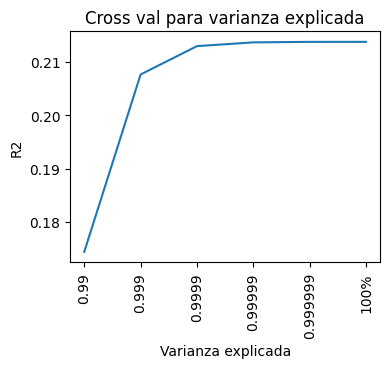

In [ ]:
import matplotlib.pyplot as plt
list_var=[0.99, 0.999, 0.9999, 0.99999, 0.999999, '100%']
plt.figure(figsize=(4, 3))
plt.plot(list_var, scor)
plt.title("Cross val para varianza explicada")
plt.xlabel("Varianza explicada")
plt.xticks(rotation=90)
plt.ylabel("R2")
plt.show()

In [ ]:
#Me quedo con esta PCA
pca = PCA(n_components=246)
Xn_pca= pca.fit_transform(Xn)
SVM = SVR().fit(Xn_pca,y)
print(np.mean(cross_val_score(SVM, Xn_pca, y, cv=5)))

0.21369568149780366


In [ ]:
Xn_hold_pca=pca.transform(Xn_hold)

###**Comprobar Hiperparametros**

####**Kernel**

In [ ]:
import matplotlib.pyplot as plt
Lista_kernel= ['linear', 'poly', 'sigmoid', 'rbf']
score_list_fun=[]
lista_intentos=[]
for i in range(0,4):

    SVM = SVR(kernel = Lista_kernel[i])
    scores = cross_val_score(SVM, Xn_pca, y, cv=5)
    score_list_fun.append(np.mean(np.array(scores)))
    lista_intentos.append(str(Lista_kernel[i]))

linear : 0.3089437136620314


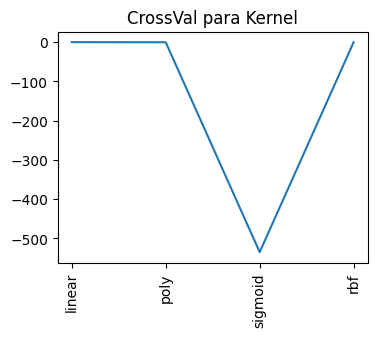

In [ ]:
print(lista_intentos[np.argmax(score_list_fun)], ":", score_list_fun[np.argmax(score_list_fun)])
plt.figure(figsize=(4,3))
plt.plot(lista_intentos, score_list_fun)
plt.xticks(rotation='vertical')
plt.title("CrossVal para Kernel")
plt.show() 

####**Gamma

In [ ]:
Lista_gamma=[0.1, 1, 100, 'auto']
score_list_gamma = []
lista_intentos_gamma=[]

for i in range(0, 4):
  SVM = SVR(kernel = 'linear', gamma=Lista_gamma[i])
  scores = cross_val_score(SVM, Xn_pca, y, cv=5)
  score_list_gamma.append(np.mean(np.array(scores)))
  lista_intentos_gamma.append(str(Lista_gamma[i]))

0.1 : 0.3089437136620314


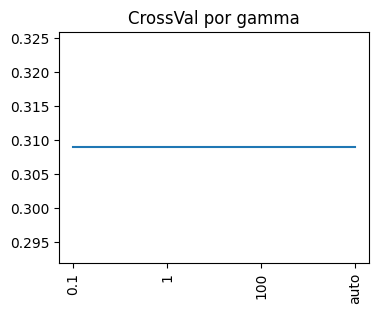

In [ ]:
print(lista_intentos_gamma[np.argmax(score_list_gamma)], ":", score_list_gamma[np.argmax(score_list_gamma)])
plt.figure(figsize=(4,3))
plt.plot(lista_intentos_gamma, score_list_gamma)
plt.xticks(rotation='vertical')
plt.title("CrossVal por gamma")
plt.show() 

In [ ]:
#me quedo con:

SVM=SVR(kernel="linear", C=100, gamma="auto").fit(Xn_pca, y)
print(SVM.score(Xn_hold_pca, y_hold))

0.45447161067731146


###Guardar 

In [ ]:
import pickle 
with open('modelo_SVM_Al.pk1', 'wb') as file:
  pickle.dump(SVM, file)
with open('scaler_SVM_Al.pk1', 'wb') as file:
  pickle.dump(scaler, file)
with open('pca_SVM_Al.pk1', 'wb') as file:
  pickle.dump(pca, file)

###Cargar

In [ ]:
with open('modelo_SVM_Al.pk1', 'rb') as file:
    SVM = pickle.load(file)
with open('scaler_SVM_Al.pk1', 'rb') as file:
    scaler = pickle.load(file)
with open('pca_SVM_Al.pk1', 'rb') as file:
    pca = pickle.load(file)

###Evaluar

In [ ]:
X_hold_ev=scaler.transform(X_hold)
X_hold_ev=pca.transform(X_hold_ev)
print(SVM.score(X_hold_ev, y_hold))

0.45447161067731146


##**ALUMINIO ANN**

###**Normalización**
R2:
>Sin normalizar: 0.205

> Normalizado: 0.477

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
y = na_setAl.iloc[:, 0]
X = na_setAl.iloc[:, 1:]
X, X_hold, y, y_hold = train_test_split(X, y,test_size=0.1, random_state=1)
scaler = StandardScaler()
scaler.fit(X)
Xn = scaler.transform(X)
scaler = StandardScaler()
scaler.fit(X_hold)
Xn_hold = scaler.transform(X_hold)

In [ ]:
#CrossVal para datos sin normalizar
regAnn = MLPRegressor(random_state=1, max_iter=500)
scores = cross_val_score(regAnn, X, y, cv=5)
print(np.mean(scores))

0.20521040476210722


In [ ]:
#CrossVal para datos normalizados
regAnn = MLPRegressor(random_state=1, max_iter=500)
scores = cross_val_score(regAnn, Xn, y, cv=5)
print(np.mean(scores))

0.4772229777236756


###**PCA**
>Mejor R2: 0.720

PCA con todos los componentes sobre datos normalizados

In [ ]:
from sklearn.decomposition import PCA
#Estamos manejando inicialmente casi 240 caracteristicas, así que podemos tener igual un porcentaje alto en la pca
var = [0.99, 0.999, 0.9999, 0.99999, 0.999999]
scor = []
for i in range(0,5):
  pca = PCA(n_components=var[i], svd_solver='full')
  Xn_pca= pca.fit_transform(Xn)
  regAnn = MLPRegressor(random_state=1, max_iter=2000)
  scor.append(np.mean(cross_val_score(regAnn, Xn_pca, y, cv=5)))

In [ ]:
pca = PCA(n_components=246)
Xn_pca= pca.fit_transform(Xn)
regAnn = MLPRegressor(random_state=1, max_iter=2000).fit(Xn_pca,y)
scor.append(np.mean(cross_val_score(regAnn, Xn_pca, y, cv=5)))
print(np.mean(cross_val_score(regAnn, Xn_pca, y, cv=5)))

0.7204483078438425


Text(0, 0.5, 'R2')

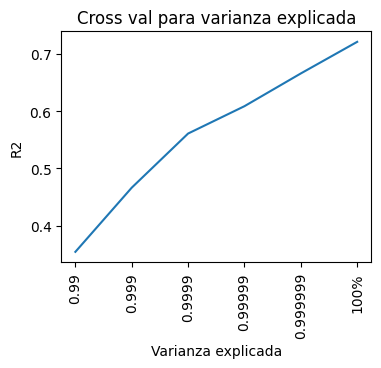

In [ ]:
import matplotlib.pyplot as plt
list_var = [0.99, 0.999, 0.9999, 0.99999, 0.999999, '100%']
plt.figure(figsize=(4,3))
plt.plot(list_var, scor)
plt.title("Cross val para varianza explicada")
plt.xlabel("Varianza explicada")
plt.xticks(rotation=90)
plt.ylabel("R2")
# plt.show()

In [ ]:
#ME QUEDO CON ESTA PCA:
pca = PCA(n_components=246)
Xn_pca= pca.fit_transform(Xn)
regAnn = MLPRegressor(random_state=1, max_iter=2000).fit(Xn_pca,y)
print(np.mean(cross_val_score(regAnn, Xn_pca, y, cv=5)))

0.7204483078438425


In [ ]:
Xn_hold_pca = pca.transform(Xn_hold)

###**Iterar hiperparámetros**
Mejor resultado: Normalizado + PCA + ReLU + Adam + Alpha = 0.0001 (default)

In [ ]:
#PROBAR COMBINACIONES SOLVER Y FUNCION DE ACTIVACIÓN
f_act = ['identity', 'logistic', 'tanh', 'relu']
solv= ['lbfgs', 'sgd', 'adam']
lista_intentos =[]
lista_scores_total = []
for i in range(0,4):#i: activacion
  for j in range(0,3):#j: solver
    regAnn = MLPRegressor(activation= f_act[i], solver=solv[j], random_state=1, max_iter=2000)
    scores = cross_val_score(regAnn, Xn_pca, y, cv=5)
    lista_scores_total.append(np.mean(np.array(scores)))
    lista_intentos.append(str(f_act[i])+ " "+str(solv[j]))

print(lista_intentos[np.argmax(lista_scores_total)], ":", lista_scores_total[np.argmax(lista_scores_total)])

plt.figure(figsize=(4,3))
plt.plot(lista_intentos, lista_scores_total)
plt.xticks(rotation='vertical')
plt.title("CrossVal por combinaciones solver y funcion de activacion")
plt.show() 

relu adam : 0.7204483078438425


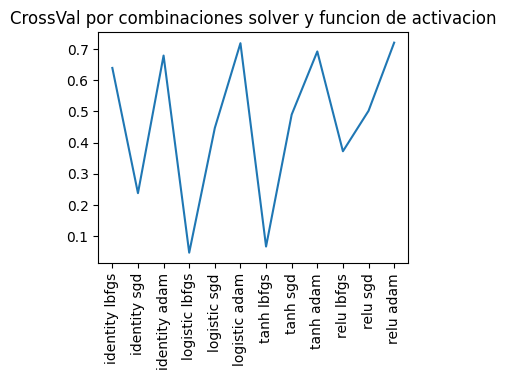

In [ ]:
print(lista_intentos[np.argmax(lista_scores_total)], ":", lista_scores_total[np.argmax(lista_scores_total)])

plt.figure(figsize=(4,3))
plt.plot(lista_intentos, lista_scores_total)
plt.xticks(rotation='vertical')
plt.title("CrossVal por combinaciones solver y funcion de activacion")
plt.show() 

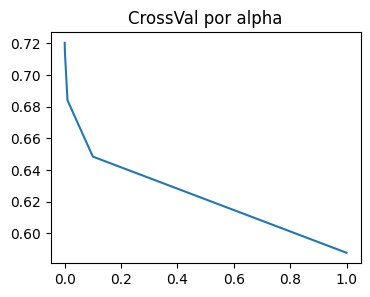

In [ ]:
import matplotlib.pyplot as plt
regul= [0.0001, 0.001, 0.01, 0.1, 1]
score_list_reg = []
for i in range(0,5):
  regAnn = MLPRegressor(activation= 'relu',solver='adam', alpha=regul[i],random_state=1, max_iter=2000)
  scores = cross_val_score(regAnn, Xn_pca, y, cv=5)
  score_list_reg.append(np.mean(scores))

plt.figure(figsize=(4,3))
plt.plot(regul, score_list_reg)
plt.title("CrossVal por alpha")
plt.show() #Mejor es 0.0001

In [ ]:
#Me quedo con:
regAnn = MLPRegressor(activation= 'relu',solver='adam',random_state=1, max_iter=2000).fit(Xn_pca,y)

In [ ]:
print(regAnn.score(Xn_hold_pca, y_hold))

0.6568047238978265


###**Guardar**

In [ ]:
import pickle
with open('modelo_ANN_Al.pkl', 'wb') as file:
    pickle.dump(regAnn, file) #Fijarse que el modelo, scaler y pca estén ajustados con los parametros decididos

with open('scaler_ANN_Al.pkl', 'wb') as file:
    pickle.dump(scaler, file)
  
with open('pca_ANN_Al.pkl', 'wb') as file:
    pickle.dump(pca, file)

###**Cargar**

In [ ]:
with open('modelo_ANN_Al.pkl', 'rb') as file:
    regAnn = pickle.load(file) #Fijarse que el modelo, scaler y pca estén ajustados con los parametros decididos

with open('scaler_ANN_Al.pkl', 'rb') as file:
    scaler = pickle.load(file)
  
with open('pca_ANN_Al.pkl', 'rb') as file:
    pca = pickle.load(file)

###**Evaluar**
>Con conjunto aparte: R2 = 0.657

In [ ]:
X_hold_ev = scaler.transform(X_hold)
X_hold_ev = pca.transform(X_hold_ev)
print(regAnn.score(X_hold_ev, y_hold))

0.6568047238978265
